In [1]:
%%capture
## compile PyRoss for this notebook
import os
owd = os.getcwd()
os.chdir('../../')
%run setup.py install
os.chdir(owd)
%matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pyross
import pandas as pd
import time

## Load Denmark age structure and contact matrix

In [9]:
my_data = np.genfromtxt('../data/age_structures/Denmark-2019.csv', delimiter=',', skip_header=1)
aM, aF = my_data[:, 1], my_data[:, 2]

Ni0=aM+aF;

M=16  ## number of age classes

Ni = Ni0[:M]
N=np.sum(Ni)

print("Age groups are in brackets of 5 (i.e. 0-4, 5-9, 10-14, .. , 75-79).")
print("Number of individuals in each bracket:")
print(Ni.astype('int'))
print("Total number of individuals: {0}".format(np.sum(Ni.astype('int'))))

Age groups are in brackets of 5 (i.e. 0-4, 5-9, 10-14, .. , 75-79).
Number of individuals in each bracket:
[302353 305513 338779 341219 379522 395469 342443 320132 366147 385944
 422585 381360 338039 319145 346572 220374]
Total number of individuals: 5505596


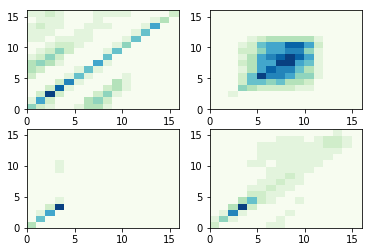

In [10]:
# Get individual contact matrices
CH, CW, CS, CO = pyross.contactMatrix.Denmark()

# By default, home, work, school, and others contribute to the contact matrix
C = CH + CW + CS + CO

# Illustrate the individual contact matrices:
fig,aCF =  plt.subplots(2,2);
aCF[0][0].pcolor(CH, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[0][1].pcolor(CW, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][0].pcolor(CS, cmap=plt.cm.get_cmap('GnBu', 10));
aCF[1][1].pcolor(CO, cmap=plt.cm.get_cmap('GnBu', 10));

C is the sum of contributions from contacts at home, workplace, schools and all other public spheres. Using superscripts $H$, $W$, $S$ and $O$ for each of these, we write the contact matrix as
$$
C_{ij} = C^H_{ij} + C^W_{ij} + C^S_{ij} + C^O_{ij}
$$

We read in these contact matrices from the data sets provided in the paper *Projecting social contact matrices in 152 countries using contact surveys and demographic data* by Prem et al, sum them to obtain the total contact matrix. We also read in the age distribution of UK obtained from the *Population pyramid* website.

# Fit with real data

In [11]:
# Get the latest data from Johns Hopkins University
!git clone https://github.com/CSSEGISandData/COVID-19

fatal: destination path 'COVID-19' already exists and is not an empty directory.


In [12]:
cases = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,789,795,803,820,832,842,850,856,868,872
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,747,748,750,751,751,752,752,754,755,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,35,36,36,36,43,43,45,45


In [13]:
deaths = pd.read_csv('COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths.shape

(266, 115)

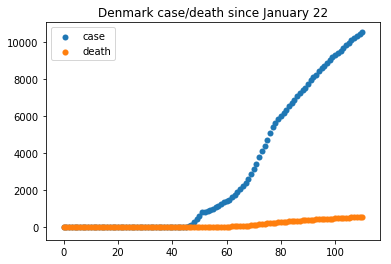

In [14]:
cols = cases.columns.tolist() 
case = cases.loc[94,][4:]
death = deaths.loc[94,][4:]
plt.scatter(np.arange(len(case)),case, label= 'case',lw=0.01);
plt.scatter(np.arange(len(death)),death, label='death', lw=0.1);
plt.title('Denmark case/death since January 22')
plt.legend();

## Using data from the repo (not exactly the same)

In [16]:
denmark_age_structured_case = pd.read_csv('../data/covid-cases/denmark_cases_by_age.csv')
denmark_age_structured_case.tail(10)

,Unnamed: 0,2020-03-13,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05
0,0-9,10,12,13,12,13,13,13,13,13,...,108,111,116,120,126,135,139,143,155,168
1,10-19,30,33,33,33,35,35,35,35,35,...,273,284,298,313,326,336,345,347,363,378
2,20-29,134,140,142,146,148,153,161,165,167,...,1093,1112,1139,1160,1188,1227,1244,1265,1287,1308
3,30-39,135,143,147,156,162,170,184,191,193,...,1162,1181,1199,1230,1262,1284,1302,1315,1339,1368
4,40-49,253,284,294,305,325,345,362,375,386,...,1600,1616,1644,1673,1687,1706,1719,1734,1757,1778
5,50-59,159,176,186,200,209,224,239,248,254,...,1637,1656,1682,1694,1714,1733,1755,1780,1805,1833
6,60-69,50,62,70,90,107,127,140,148,156,...,1068,1074,1090,1106,1122,1137,1141,1155,1164,1178
7,70-79,5,26,39,55,70,82,100,118,132,...,806,819,825,833,842,848,851,864,871,876
8,80-89,7,18,28,38,51,65,77,87,98,...,628,642,649,666,673,682,685,693,701,706
9,90+,2,4,8,9,12,12,15,15,16,...,200,203,209,213,218,223,226,227,228,228


In [17]:
case = denmark_age_structured_case.sum(axis=0)[1:]


We will use the **infective number** for (52 days) for the initial conditions Is and Ia. 

In [18]:
## infective people
nbday = denmark_age_structured_case.shape[1]-1
nbgroup = denmark_age_structured_case.shape[0]
I = np.array(np.zeros([nbday, nbgroup-2]))
for i in range(1,nbday+1):
    I[i-1] = np.array([denmark_age_structured_case.iloc[:,i][:nbgroup-2]])
## we don't want a cum sum 
I[1:] -= I[:-1].copy()
I[3,0] = 1
##  duplicate for each subgroup of age 
M = 16
Is = np.array(np.zeros([nbday, M]))
for i in range(I.shape[0]):
    Is[i] = np.array([val for val in I[i]/2 for _ in (0, 1)])

## take only integer values, loosing cases !
for j in range(Is.shape[0]):
    Is[j] = np.array([int(i) for i in Is[j]])

##  Define model parameters



In [19]:
beta  = 0.036692            # infection rate 

gE    = 1/5.
gA    = 1/4.
gIa   = 1./3.                # recovery rate of asymptomatic infectives 
gIs   = 1./7                # recovery rate of symptomatic infectives 
alpha = 0.4                 # fraction of asymptomatic infectives 
fsa   = 0.2                 # the self-isolation parameter   
fh    = 0
gIh   = 1/7
gIc   = 1/14
 
sa  = 0*np.ones(M)      #  rate of additional/removal of population by birth etc
sa[0]  = 0            # birth
sa[3] = 0          # mortality


hh   = 0.1*np.ones(M)       # fraction which goes from Is to hospital
hh[:M] = 0.01
hh[M:2*M] = 0.025
cc   = 0.05*np.ones(M)      # fraction which goes from  hospital to ICU 
mm   = 0.4*np.ones(M)       # mortality from IC


# initial conditions    
Is_0 = Is[0,]
# np.zeros((M)); 
 
Ia_0 = Is[0,]
# 10*np.ones((M)) # start with 10 asymptomatic infectives
R_0  = np.zeros((M))
E_0  = np.zeros((M))
A_0  = np.zeros((M))
Ih_0  = np.zeros((M))
Ic_0  = np.zeros((M))
Im_0  = np.zeros((M))

S_0  = Ni - (E_0 + A_0 + Ia_0 + Is_0 + Ih_0 + Ic_0 +Im_0 + R_0)

In [21]:
# time_points to solve the ode (using odeint) Ti = 0 by default 
Tf=350;  Nf=Tf+2;  
# Tf=350;  Nf=3500;  #Tf is the final day np.linspace(Ti, Tf, Nf) 
# 1 day = 3

## Define events for protocol

In [22]:
# Dummy event for initial (standard) contact matrix
events = [lambda t: 1]
contactMatrices = [C]

# After 20 days, start lockdown
lockdown_threshold_0 = 20
def event0(t,rp):
    return t - lockdown_threshold_0
events.append(event0)
contactMatrices.append( CH + 0.1*CW + 0.4*CS )

# After 25 days, decrease contacts even further
lockdown_threshold_1 = 25
def event1(t,rp):
    return t- lockdown_threshold_1
events.append(event1)
contactMatrices.append( CH + 0.1*CW)

# After 70 days, add 50% of school contacts to contact matrix
lockdown_threshold_2 = 55
def event2(t,rp):
    return t - lockdown_threshold_2
events.append(event2)
contactMatrices.append( CH + 0.1*CW + 0.5*CS ) # everybody in lockdown

## Simulate protocol and analyse results

#### Initialise pyross.control, run and plot a single test simulation

In [23]:
# duration of simulation
Tf=150;  Nf=Tf+1;  

# intantiate model
parameters = {'alpha':alpha,'beta':beta, 'gIa':gIa,'gIs':gIs,
              'gIh':gIh,'gIc':gIc,  'gE':gE, 'gA':gA,
              'fsa':fsa, 'fh':fh, 
              'sa':sa, 
              'hh':hh, 'cc':cc, 'mm':mm}
model = pyross.control.SEAI5R(parameters, M, Ni.copy())

# run model once
method='gillespie'
data=model.simulate(S_0, E_0, A_0, Ia_0, Is_0, Ih_0, Ic_0, Im_0,
                    events,contactMatrices, Tf, Nf,
                                method=method)

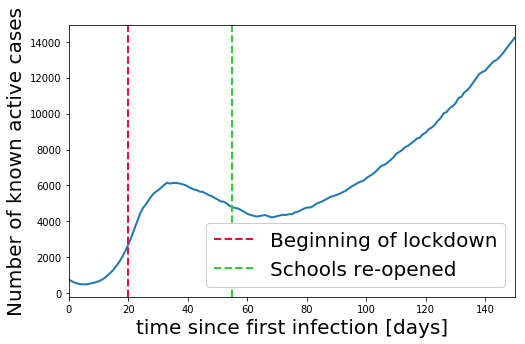

In [24]:
# Plot result
t = data['t']; 

# get total population in classes
# - symptomatic infective,
# - hospitalised,
# - in ICU
y_plot = np.sum ( data['X'][:,4*M:7*M], axis = -1)

lw=2
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(t,y_plot,lw=lw,)
ax.axvline(data['events_occured'][0][0],
           color='crimson',lw=lw,
          label='Beginning of lockdown',ls='--')
ax.axvline(data['events_occured'][-1][0],
 color='limegreen',lw=lw,
          label='Schools re-opened',ls='--')
ax.set_xlim(0,Tf)
fs=20
ax.legend(loc='best',fontsize=fs,framealpha=1)
ax.set_xlabel('time since first infection [days]',fontsize=fs)
ax.set_ylabel('Number of known active cases',fontsize=fs)
plt.show(fig)
plt.close(fig)
# plt.savefig('Denmarkcovid19.png', format='png', dpi=200)

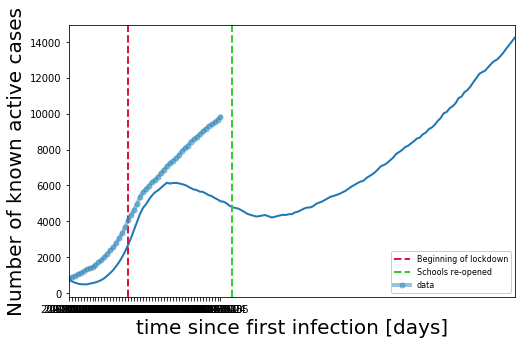

In [25]:
t = data['t']; 

y_plot = np.sum ( data['X'][:,4*M:7*M], axis = -1)


lw=2
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(t,y_plot,lw=lw,)
ax.axvline(data['events_occured'][0][0],
           color='crimson',lw=lw,
          label='Beginning of lockdown',ls='--')
ax.axvline(data['events_occured'][-1][0],
 color='limegreen',lw=lw,
          label='Schools re-opened',ls='--')
ax.set_xlim(0,Tf)
fs=20


cases= case

# day, cases = np.array(np.arange(1,Tf)), np.array(case[0:Tf])
ax.plot(cases, 'o-', lw=4, color='#348ABD', ms=5, label='data', alpha=0.5)



ax.legend(loc='best',fontsize=8,framealpha=1)
ax.set_xlabel('time since first infection [days]',fontsize=fs)
ax.set_ylabel('Number of known active cases',fontsize=fs)
plt.show(fig)



In [26]:
data_array = data['X']
t = data['t']
np.save('SEAI5R_latent_traj.npy', data_array)

## Infer latent data using first observations for Infected Ind

In [27]:
# load the data 
x = np.load('SEAI5R_latent_traj.npy').astype('float') # 9 equations * 16
x.shape

(151, 144)

We force the observed data into x.

In [28]:
## Is non cumulative - 52 days from the data
dayobs = 52
# x[:dayobs,3*M:4*M].shape
x[:dayobs,3*M:4*M] = Is

In [29]:
x.shape

(151, 144)

In [30]:
steps = 101 # number internal integration steps taken
# obs used for inference 
Tf_inference = 52
Nf_inference = Tf_inference + 1
x = x[:Nf_inference,:8*M]/N # remove the last equation only
x.shape 

(53, 128)

In [31]:
# fraction of population in Age group
fi = Ni/sum(Ni)
Ni = N *fi

In [32]:
# initialise the estimator 
estimator = pyross.inference.SEAI5R(parameters, M, fi, int(N), steps)

In [33]:
## create filter to distinguish between observable classes
fltr=np.repeat(np.array([False, False, False, False, True, True, True, True]), M) # take only 4 equations
obs=x[:,fltr]
x0 = x[0]
obs.shape

(53, 64)

In [34]:
## matrix with all events
def contactMatrix(t):
    return contactMatrices[3]

In [35]:
eps = 1e-4 

alpha_g = 0.25          
alpha_std = 0.1
alpha_b = (0.05, 0.5)

beta_g  = 0.06         
beta_std = 0.1
beta_b = (eps, 1)

gIa_g   = 0.13
gIa_std = 0.05 
gIa_b = (eps, 0.5)

gIs_g   = 0.13
gIs_std = 0.05 
gIs_b = (eps, 0.5) 

gE_g    = 0.21 
gE_std = 0.05
gE_b = (0.1, 0.3)

gA_g    = 0.35 
gA_std = 0.05 
gA_b = (0.2, 0.5) 
   

E0_g = (E_0+3)/N
E0_std = E0_g
E0_b = [[0.1/N, 100/N]]*M 

A0_g  = (A_0+3)/N
A0_std = A0_g
A0_b = [[0.1/N, 100/N]]*M

Ia0_g = (Ia_0+0.2)/N 
Ia0_std = [5/N]*M
Ia0_b = [(0.1/N, 100/N)]*M

Is0_g = (Is_0+0.1)/N 
Is0_std = [5/N]*M  
Is0_b = [(0.1/N, 100/N)]*M

Ih0_g = (Ih_0+0.1)/N 
Ih0_std = [5/N]*M 
Ih0_b = [(0.1/N, 100/N)]*M

Ic0_g = (Ic_0+0.1)/N 
Ic0_std = [5/N]*M 
Ic0_b = [(0.1/N, 100/N)]*M

Im0_g = (Im_0+0.1)/N 
Im0_std = [5/N]*M 
Im0_b = [(0.1/N, 100/N)]*M

S0_g = (S_0-10)/N 
S0_std = E0_std*4 
S0_b = [(1/N, f) for f in fi]

# optimisation parameters 
ftol = 1e-4 # the relative tol in (-logp)   
bounds = np.array([alpha_b, beta_b, gIa_b, gIs_b, gE_b, gA_b, 
                   *S0_b, *E0_b, *A0_b, *Ia0_b, *Is0_b, *Ih0_b, *Ic0_b, *Im0_b])
guess = np.array([alpha_g, beta_g, gIa_g, gIs_g, gE_g, gA_g, 
                   *S0_g, *E0_g, *A0_g, *Ia0_g, *Is0_g, *Ih0_g, *Ic0_g, *Im0_g])
stds = np.array([alpha_std, beta_std, gIa_std, gIs_std, gE_std, gA_std, 
                 *S0_std, *E0_std, *A0_std, *Ia0_std, *Is0_std, *Ih0_std, *Ic0_std, *Im0_std])



In [36]:
start_time = time.time()
params = estimator.latent_inference(guess, stds, obs, fltr, Tf_inference, Nf_inference, 
                                    contactMatrix, bounds, 
                                    global_max_iter=30, global_ftol_factor=1e3, verbose=True, ftol=ftol) 
end_time = time.time()
print(end_time - start_time)

Starting global minimisation...


/Users/ines_admin/anaconda3/lib/python3.7/site-packages/cma/utilities/utils.py:347: UserWarning: 
            Initial solution is out of the domain boundaries:
                x0   = [2.50000e-01 6.00000e-02 1.30000e-01 1.30000e-01 2.10000e-01 3.50000e-01
 6.04666e+01 6.10986e+01 6.77478e+01 6.82358e+01 7.58756e+01 7.90650e+01
 6.84598e+01 6.39976e+01 7.31770e+01 7.71364e+01 8.44834e+01 7.62384e+01
 6.75958e+01 6.38170e+01 6.93116e+01 4.40720e+01 6.00000e-04 6.00000e-04
 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04
 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04
 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04
 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04
 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04 6.00000e-04
 1.04000e-03 1.04000e-03 3.04000e-03 3.04000e-03 1.34400e-02 1.34400e-02
 1.34400e-02 1.34400e-02 2.52400e-02 2.52400e-02 1.58400e-02 1.58400e-02
 5.04000e-03 5

ValueError: argument of inverse must be within the given bounds

In [ ]:
# save the parameters 
np.save('SEAI5R_latent_param.npy', params)

In [ ]:
print('True parameters')
print(parameters)

params = np.load('SEAI5R_latent_param.npy')
best_estimates = estimator.make_params_dict(params)
print('\n Best estimates')
print(best_estimates)

print('\n True initial conditions: ') 
print(S0, E0, A0, Ia0, Is0, Ih0, Ic0, Im0)
print('\n Inferred initial conditons: ') 
print((params[6:]*N).astype('int'))